### Importando bibliotecas

In [2]:
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt
import scipy.stats as stats
import statsmodels.tsa.stattools as sts

### Definindo as funções

In [5]:
# Verificar se a série possui normalidade
def testenormal(x):
    e,p=stats.shapiro(x)
    if p>=0.05:
        return "A serie é normal"
    else:
        return "A serie NÃO é normal"
    
# Verificar se a série é estacionária
def testeestacionaria(x):
    kpss=sts.kpss(x)
    teste=kpss[0]
    valorcritico=kpss[3]['5%']
    if teste>valorcritico:
        return "A serie NÃO é estacionaria"
    else:
        return "A serie é estacionaria"

### Questões - Exercicio 2

1. Carregue o arquivo "DENGUE_MBA_ST.csv". Faça o que se pede:

In [ ]:
# Carregando o dataset
df=pd.read_csv('..\datasets\DENGUE_MBA_ST.csv')
df.head()

,ANO,SEMANA_DO_ANO,AEROLANDIA,AEROPORTO,ALDEOTA,ALTO DA BALANCA,ALVARO WEYNE,AMADEU FURTADO,ANCURI,ANTONIO BEZERRA,...,VICENTE PINZON,VILA ELLERY,VILA PERY,VILA UNIAO,VILA VELHA,ALAGADICO,GENTILANDIA,MATA GALINHA,PAN-AMERICANO,DATA
0,2011,1,0,0,1,0,0,0,3,0,...,1,0,1,0,2,0.0,0.0,0.0,0.0,2011-01-09
1,2011,2,0,0,0,0,1,0,1,0,...,1,1,5,1,4,0.0,0.0,0.0,0.0,2011-01-16
2,2011,3,0,0,2,1,1,0,7,1,...,6,0,6,4,2,0.0,0.0,0.0,0.0,2011-01-23
3,2011,4,0,0,0,0,2,0,2,0,...,6,2,8,1,0,0.0,0.0,0.0,0.0,2011-01-30
4,2011,5,0,0,0,1,4,0,2,0,...,6,2,2,5,1,0.0,0.0,0.0,0.0,2011-02-06


In [7]:
### Ajustadndo dataframe
# Convertendo a coluna 'DATA' para o tipo datetime
df['DATA']=pd.to_datetime(df['DATA'])

In [8]:
df

,ANO,SEMANA_DO_ANO,AEROLANDIA,AEROPORTO,ALDEOTA,ALTO DA BALANCA,ALVARO WEYNE,AMADEU FURTADO,ANCURI,ANTONIO BEZERRA,...,VICENTE PINZON,VILA ELLERY,VILA PERY,VILA UNIAO,VILA VELHA,ALAGADICO,GENTILANDIA,MATA GALINHA,PAN-AMERICANO,DATA
0,2011,1,0,0,1,0,0,0,3,0,...,1,0,1,0,2,0.0,0.0,0.0,0.0,2011-01-09
1,2011,2,0,0,0,0,1,0,1,0,...,1,1,5,1,4,0.0,0.0,0.0,0.0,2011-01-16
2,2011,3,0,0,2,1,1,0,7,1,...,6,0,6,4,2,0.0,0.0,0.0,0.0,2011-01-23
3,2011,4,0,0,0,0,2,0,2,0,...,6,2,8,1,0,0.0,0.0,0.0,0.0,2011-01-30
4,2011,5,0,0,0,1,4,0,2,0,...,6,2,2,5,1,0.0,0.0,0.0,0.0,2011-02-06
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
518,2020,49,0,0,0,0,1,0,2,0,...,0,0,1,0,0,0.0,0.0,0.0,0.0,2020-12-06
519,2020,50,0,0,0,0,1,0,1,0,...,0,0,0,0,2,0.0,0.0,0.0,0.0,2020-12-13
520,2020,51,0,0,0,0,0,0,0,0,...,0,0,2,0,0,0.0,0.0,0.0,0.0,2020-12-20
521,2020,52,0,0,0,0,0,0,0,0,...,0,0,0,0,1,0.0,0.0,0.0,0.0,2020-12-27


a. Quantos casos de dengue há em cada ano para a cidade de Fortaleza?

In [19]:
# Criando dataframe apenas com os bairros e anos
df_a = df.drop(['SEMANA_DO_ANO','DATA'],axis=1).columns
casos_ano = pd.Series(df[df_a].sum(axis=1).values,index=df['ANO'].values)

# Agrupando por ano
casos_ano_group = casos_ano.groupby(casos_ano.index).sum()

casos_ano_group

2011    137784.0
2012    141796.0
2013    113036.0
2014    109663.0
2015    132923.0
2016    127849.0
2017    118353.0
2018    106344.0
2019    108766.0
2020    114749.0
dtype: float64

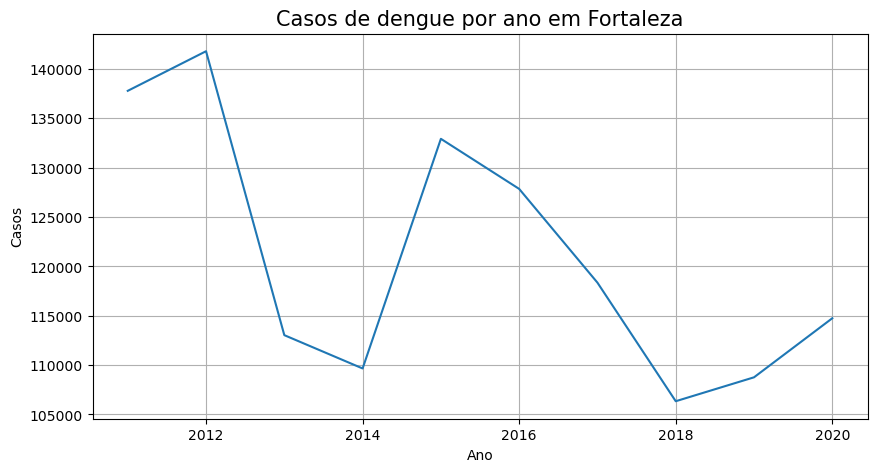

In [27]:
# Apresentando o gráfico
plt.figure(figsize=(10,5))
plt.plot(casos_ano_group)
plt.title('Casos de dengue por ano em Fortaleza',fontsize=15)
plt.xlabel('Ano')
plt.ylabel('Casos')
plt.grid()
plt.show()

b. Crie gráficos temporal apresentando algumas médias móveis para o número de casos de Dengue em Fortaleza.

In [39]:
# capturando todos os nomes dos bairros
bairroname=df.drop(['ANO','SEMANA_DO_ANO','DATA'],axis=1).columns

# Convertendo a coluna 'DATA' para o tipo datetime
df['DATA'] = pd.to_datetime(df['DATA'])

# Dado de Fortaleza
Fortaleza=pd.Series(df[bairroname].sum(axis=1).values,index=df['DATA'].values)

# Ordenar pela data
Fortaleza=Fortaleza.sort_index()

# Removendo valores nulos
Fortaleza=Fortaleza.dropna()

In [40]:
Fortaleza

2011-01-09    200.0
2011-01-16    296.0
2011-01-23    288.0
2011-01-30    297.0
2011-02-06    341.0
              ...  
2020-12-06     29.0
2020-12-13     26.0
2020-12-20     36.0
2020-12-27     21.0
2020-12-31     17.0
Length: 523, dtype: float64

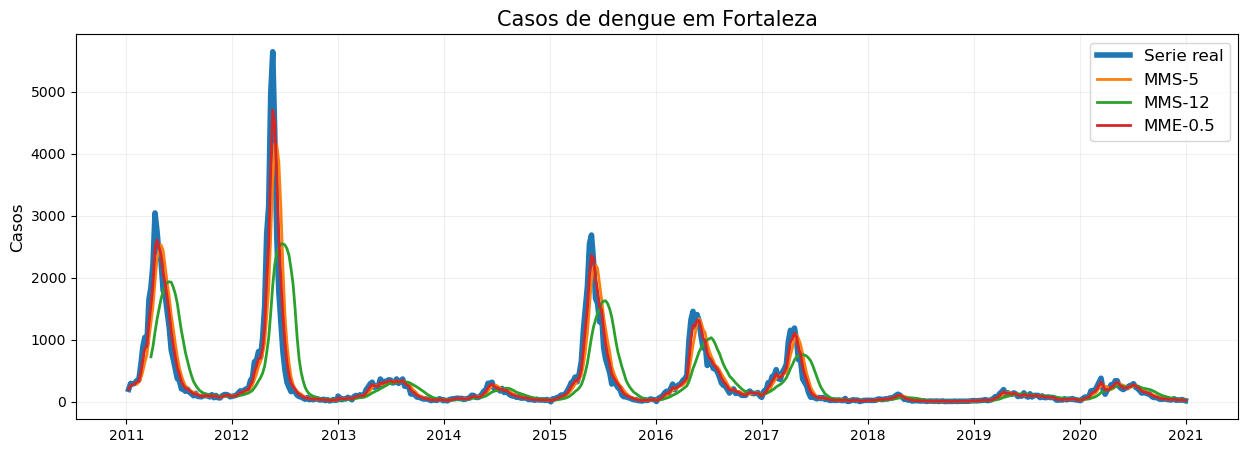

In [46]:
plt.figure(figsize=(15,5))
plt.plot(Fortaleza,lw=4,label='Serie real')
plt.plot(Fortaleza.rolling(5).mean(),label='MMS-5',lw=2)
plt.plot(Fortaleza.rolling(12).mean(),label='MMS-12',lw=2)
plt.plot(Fortaleza.ewm(alpha=0.5).mean(),label='MME-0.5',lw=2)
plt.ylabel('Casos',fontsize=12)
plt.grid(alpha=0.2)
plt.title('Casos de dengue em Fortaleza',fontsize=15)
plt.legend(fontsize=12)

c. O dado é estacionário?

In [44]:
testeestacionaria(Fortaleza)

'A serie NÃO é estacionaria'

d. O dado apresenta uma distribuição normal?

In [45]:
testenormal(Fortaleza)

'A serie NÃO é normal'

e. Escolha um periodo para treinar o algum modelo de ML e faça a predição de algumas semanas posteriores. Crie um gráfico demonstrando o predição. Qual é a melhor forma de dividir o dado? 

In [ ]:
from sklearn.metrics import mean_absolute_error
from sklearn.model_selection import train_test_split
from xgboost import XGBRegressor

f. Para 2011, as séries temporais de casos de dengue entre bairros são semelhantes? Calcule a correlação entre os pares de bairros e verifique o valor médio.